In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
os.chdir('/content/MyDrive/MyDrive/Colab Notebooks/TSR/dataset')
!ls

In [ ]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

#cur_path
Image.open('/content/MyDrive/MyDrive/Colab Notebooks/TSR/dataset/Train/38/00038_00068_00029.png')

In [ ]:
for i in range(classes):
  path = os.path.join(cur_path,'Train',str(i))
  images = os.listdir(path)
  
  for a in images:
    try:
      image = Image.open(path + '/' + a)
      image = image.resize((30,30))
      image = np.array(image)
      data.append(image)
      labels.append(i)
    except Exception as e:
      print(e)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
#os.mkdir('trainingFinal')
np.save('./trainingFinal/data',data)
np.save('./trainingFinal/target',labels)

In [13]:
data=np.load('./trainingFinal/data.npy')
labels=np.load('./trainingFinal/target.npy')

In [ ]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


ONE HOT ENCODING

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# class sebesar 43
model.add(Dense(43, activation='softmax'))

In [ ]:
#kompilsasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

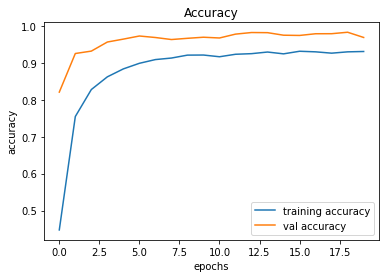

In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


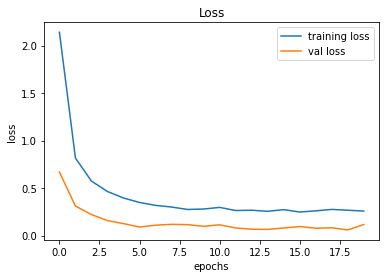

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
def testing():
    y_test = pd.read_csv('/content/MyDrive/MyDrive/Colab Notebooks/TSR/dataset/Test.csv')
    label = y_test["ClassId"].values
    #print(label)
    imgs = y_test["Path"].values
    #print(imgs)
    data=[]
    a = 0
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
        a = a + 1
        print(a)
    X_test=np.array(data)
    return X_test,label

In [ ]:
X_test, label = testing()

In [ ]:
Y_pred = model.predict(X_test)
Y_pred

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, np.argmax(Y_pred, axis=1)))

In [ ]:
model.save("./trainingFinal/TSR.h5")

In [14]:
import os
os.chdir(r'/content/MyDrive/MyDrive/Colab Notebooks/TSR/dataset')
from keras.models import load_model
model = load_model('./trainingFinal/TSR.h5')

In [15]:
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    datao = len(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    return image,Y_pred,datao

In [ ]:
ls

1/1 [==============================] - 0s 206ms/step
Stop


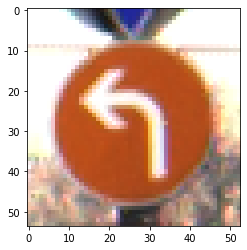

In [22]:
path_model = "/content/MyDrive/MyDrive/Colab Notebooks/TSR/dataset/trainingClau/TSR.h5"
loaded_model = tf.keras.models.load_model(path_model)
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/MyDrive/MyDrive/Colab Notebooks/TSR/dataset/Test/00032.png")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((30, 30))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
#input_data = input_data

pred = loaded_model.predict(input_data)
result = pred.argmax()
plt.imshow(image)
print(classes[result])


#plot,prediction,data = test_on_img(r'/content/MyDrive/MyDrive/Colab Notebooks/TSR/dataset/Test/00212.png')


